In [109]:

import os
import mlflow
import mlflow.sklearn
import pandas as pd
import requests, certifi
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt




from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Data Extration

In [ ]:


# url = (
#     "https://data.cityofchicago.org/resource/ijzp-q8t2.csv"
#     "?$limit=500000"
#     "&$order=date%20DESC"
# )

# text = requests.get(url).text
# df = pd.read_csv(StringIO(text))

# print(df.shape)
# df.head()


In [ ]:
# df.to_csv("chicago_crime_500k_raw.csv", index=False)
# df = pd.read_csv("chicago_crime_500k_raw.csv")
# df.shape

In [ ]:
# df = pd.read_csv("chicago_crime_500k_raw.csv")

In [ ]:
# df.shape

(500000, 22)

In [ ]:
# df.info()

<class 'pandas.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    500000 non-null  int64  
 1   case_number           500000 non-null  str    
 2   date                  500000 non-null  str    
 3   block                 500000 non-null  str    
 4   iucr                  500000 non-null  str    
 5   primary_type          500000 non-null  str    
 6   description           500000 non-null  str    
 7   location_description  497843 non-null  str    
 8   arrest                500000 non-null  bool   
 9   domestic              500000 non-null  bool   
 10  beat                  500000 non-null  int64  
 11  district              500000 non-null  int64  
 12  ward                  499999 non-null  float64
 13  community_area        499997 non-null  float64
 14  fbi_code              500000 non-null  str    
 15  x_coordinat

In [ ]:
# df.head()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,14092363,JK126768,2026-01-25T00:00:00.000,090XX S CHAPPEL AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,RESIDENCE,False,False,...,8.0,48.0,04A,1191417.0,1845534.0,2026,2026-02-01T15:42:10.000,41.731145,-87.574354,"\n, \n(41.731145378, -87.574354255)"
1,14092474,JK126949,2026-01-25T00:00:00.000,027XX W HARRISON ST,1120,DECEPTIVE PRACTICE,FORGERY,OTHER (SPECIFY),False,False,...,28.0,27.0,10,1158248.0,1897253.0,2026,2026-02-01T15:42:10.000,41.873808,-87.694456,"\n, \n(41.873807522, -87.69445629)"
2,14092405,JK126778,2026-01-25T00:00:00.000,041XX W 78TH ST,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",RESIDENCE,False,True,...,18.0,70.0,04B,1150344.0,1852738.0,2026,2026-02-01T15:42:10.000,41.751810,-87.724634,"\n, \n(41.751809787, -87.724633841)"
3,14092637,JK127220,2026-01-25T00:00:00.000,071XX W HIGGINS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,41.0,10.0,07,1127782.0,1936028.0,2026,2026-02-01T15:42:10.000,41.980779,-87.805438,"\n, \n(41.980778822, -87.80543826)"
4,14092355,JK126734,2026-01-25T00:00:00.000,001XX W 63RD ST,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,GAS STATION,False,False,...,20.0,68.0,04B,1176275.0,1863208.0,2026,2026-02-01T15:42:10.000,41.779998,-87.629295,"\n, \n(41.77999793, -87.629294594)"


In [ ]:
# df.dtypes

id                        int64
case_number                 str
date                        str
block                       str
iucr                        str
primary_type                str
description                 str
location_description        str
arrest                     bool
domestic                   bool
beat                      int64
district                  int64
ward                    float64
community_area          float64
fbi_code                    str
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on                  str
latitude                float64
longitude               float64
location                    str
dtype: object

In [ ]:
# df.isnull().sum()

id                         0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    2157
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       1
community_area             3
fbi_code                   0
x_coordinate            1387
y_coordinate            1387
year                       0
updated_on                 0
latitude                1387
longitude               1387
location                1387
dtype: int64

# data imputation and data cleaning 


In [2]:
df = pd.read_csv("chicago_crime_500k_raw.csv")

In [3]:
df = df.dropna(subset=["latitude", "longitude"]) 


In [4]:
df["location_description"] = df["location_description"].fillna("UNKNOWN")

In [5]:
df["ward"] = df["ward"].fillna(0)

In [6]:
df["x_coordinate"] = df["x_coordinate"] .fillna(df["x_coordinate"].median())
df["y_coordinate"] = df["y_coordinate"] .fillna(df["y_coordinate"].median())


In [7]:
df.isnull().sum()

id                      0
case_number             0
date                    0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          3
fbi_code                0
x_coordinate            0
y_coordinate            0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64

In [8]:
# changing Data Type 
df.dtypes

id                        int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                  int64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [9]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df["updated_on"] = pd.to_datetime(df["updated_on"], errors="coerce")

In [10]:
df["ward"] = df["ward"].fillna(df["ward"].mode()[0]).astype("Int64")
df["community_area"] = df["community_area"].fillna(df["community_area"].mode()[0]).astype("Int64")


In [11]:
df["arrest"] = df["arrest"].astype(int)
df["domestic"] = df["domestic"].astype(int)


In [12]:
df.dtypes


id                               int64
case_number                     object
date                    datetime64[ns]
block                           object
iucr                            object
primary_type                    object
description                     object
location_description            object
arrest                           int64
domestic                         int64
beat                             int64
district                         int64
ward                             Int64
community_area                   Int64
fbi_code                        object
x_coordinate                   float64
y_coordinate                   float64
year                             int64
updated_on              datetime64[ns]
latitude                       float64
longitude                      float64
location                        object
dtype: object

In [13]:
df["hour"] = df["date"].dt.hour           # 0–23
df["day_of_week"] = df["date"].dt.dayofweek  # 0=Monday, 6=Sunday
df["month"] = df["date"].dt.month         # 1–12


In [14]:
df[["date", "hour", "day_of_week", "month"]].head()


,date,hour,day_of_week,month
0,2026-01-25,0,6,1
1,2026-01-25,0,6,1
2,2026-01-25,0,6,1
3,2026-01-25,0,6,1
4,2026-01-25,0,6,1


In [15]:
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)


In [16]:
df.shape

(498613, 26)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498613 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    498613 non-null  int64         
 1   case_number           498613 non-null  object        
 2   date                  498613 non-null  datetime64[ns]
 3   block                 498613 non-null  object        
 4   iucr                  498613 non-null  object        
 5   primary_type          498613 non-null  object        
 6   description           498613 non-null  object        
 7   location_description  498613 non-null  object        
 8   arrest                498613 non-null  int64         
 9   domestic              498613 non-null  int64         
 10  beat                  498613 non-null  int64         
 11  district              498613 non-null  int64         
 12  ward                  498613 non-null  Int64         
 13  comm

In [18]:
df.describe()

,id,date,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,hour,day_of_week,month,is_weekend
count,4.986130e+05,498613,498613.000000,498613.000000,498613.00000,498613.000000,498613.0,498613.0,4.986130e+05,4.986130e+05,498613.000000,498613,498613.000000,498613.000000,498613.000000,498613.000000,498613.000000,498613.000000
mean,1.368626e+07,2025-01-08 16:02:47.626952960,0.148380,0.187207,1150.40872,11.274122,23.121814,36.273232,1.165485e+06,1.887440e+06,2024.524489,2025-07-23 19:22:03.062461440,41.846713,-87.668204,12.502039,3.016422,6.486044,0.288615
min,2.793900e+04,2024-01-12 13:25:00,0.000000,0.000000,111.00000,1.000000,0.0,1.0,1.092647e+06,1.813897e+06,2024.000000,2024-01-21 15:41:21,41.644590,-87.934567,0.000000,0.000000,1.000000,0.000000
25%,1.352639e+07,2024-07-08 21:30:00,0.000000,0.000000,532.00000,5.000000,10.0,22.0,1.154192e+06,1.860376e+06,2024.000000,2025-05-17 15:40:52,41.772328,-87.709271,8.000000,1.000000,4.000000,0.000000
50%,1.371137e+07,2024-12-31 00:45:00,0.000000,0.000000,1033.00000,10.000000,23.0,32.0,1.167388e+06,1.894061e+06,2024.000000,2025-10-03 15:42:47,41.865036,-87.660855,13.000000,3.000000,7.000000,0.000000
75%,1.390223e+07,2025-07-12 09:30:00,0.000000,0.000000,1732.00000,17.000000,34.0,53.0,1.176776e+06,1.910210e+06,2025.000000,2025-11-02 15:41:09,41.909510,-87.626890,18.000000,5.000000,9.000000,1.000000
max,1.409726e+07,2026-01-25 00:00:00,1.000000,1.000000,2535.00000,31.000000,50.0,77.0,1.205119e+06,1.951517e+06,2026.000000,2026-02-01 15:42:10,42.022559,-87.524529,23.000000,6.000000,12.000000,1.000000
std,6.587220e+05,NaN,0.355476,0.390078,708.69185,7.081790,13.941886,21.567617,1.621032e+04,3.147017e+04,0.548236,NaN,0.086539,0.059027,6.829519,2.000574,3.375052,0.453119


In [19]:
df.to_csv("chicago_crime_500k_cleaned.csv", index=False)


# Exploratory Data Analysis (EDA)

In [110]:

crime_counts = df["primary_type"].value_counts()
crime_counts.head(10)


primary_type
THEFT                  116249
BATTERY                 89517
CRIMINAL DAMAGE         55247
ASSAULT                 45330
MOTOR VEHICLE THEFT     39228
OTHER OFFENSE           34028
DECEPTIVE PRACTICE      30526
BURGLARY                18420
ROBBERY                 14920
NARCOTICS               13593
Name: count, dtype: int64

In [111]:
crime_percentage = (crime_counts / crime_counts.sum()) * 100
crime_percentage.head(10)


primary_type
THEFT                  23.314474
BATTERY                17.953202
CRIMINAL DAMAGE        11.080136
ASSAULT                 9.091219
MOTOR VEHICLE THEFT     7.867424
OTHER OFFENSE           6.824531
DECEPTIVE PRACTICE      6.122183
BURGLARY                3.694248
ROBBERY                 2.992301
NARCOTICS               2.726162
Name: count, dtype: float64

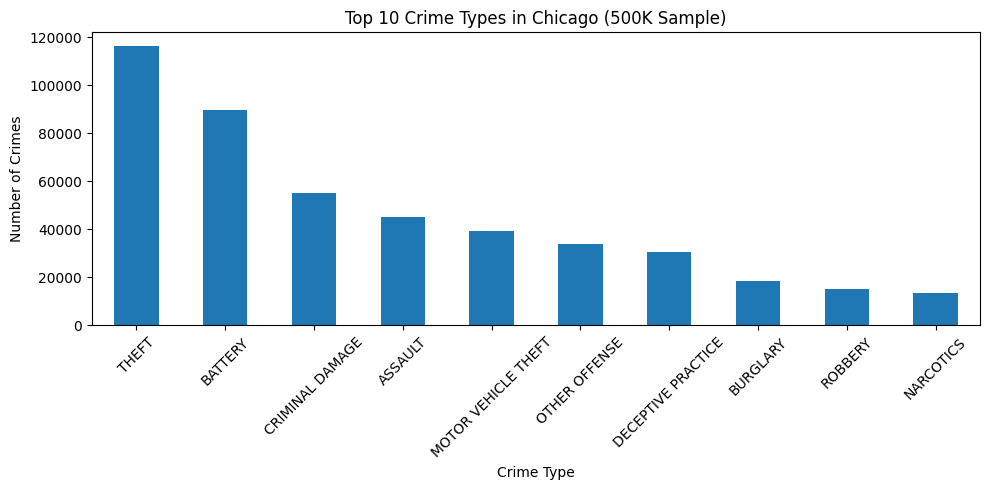

In [112]:


# Top 10 crime types in chicago
plt.figure(figsize=(10,5))
crime_counts.head(10).plot(kind="bar")
plt.title("Top 10 Crime Types in Chicago (500K Sample)")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [113]:
#Crime by Hour of Day
hourly_counts = df["hour"].value_counts().sort_index()
hourly_counts


hour
0     33748
1     16526
2     14737
3     12934
4     10530
5      9178
6      9784
7     12743
8     17272
9     20571
10    21461
11    22018
12    28581
13    22684
14    24067
15    27105
16    26770
17    26913
18    26467
19    25950
20    24687
21    22693
22    21590
23    19604
Name: count, dtype: int64

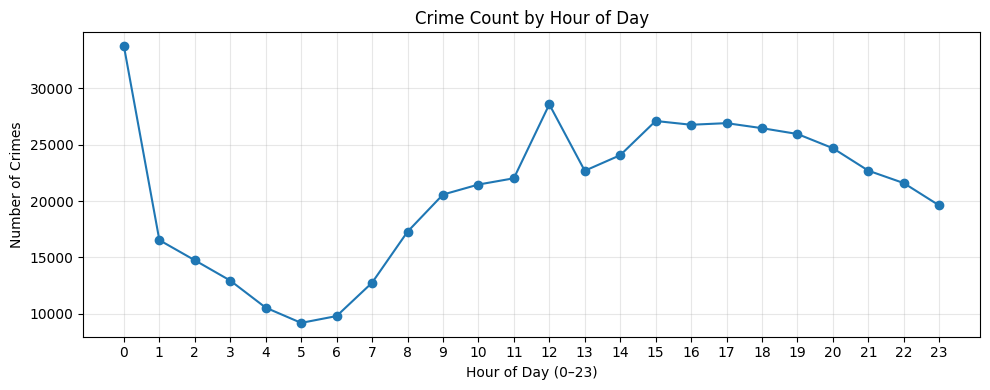

In [114]:

#Crime by Hour of Day

plt.figure(figsize=(10,4))
hourly_counts.plot(kind="line", marker="o")
plt.title("Crime Count by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [115]:
#Crime by Week
day_counts = df["day_of_week"].value_counts().sort_index()
day_counts


day_of_week
0    71576
1    69433
2    70384
3    69823
4    73490
5    73045
6    70862
Name: count, dtype: int64

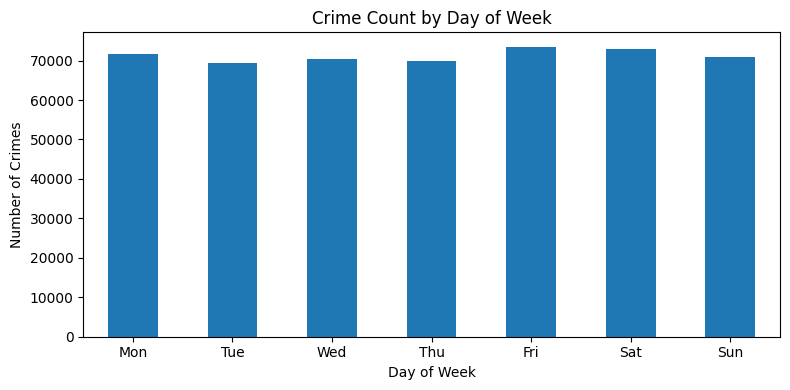

In [116]:
plt.figure(figsize=(8,4))
day_counts.plot(kind="bar")
plt.title("Crime Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.xticks(
    ticks=range(7),
    labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],
    rotation=0
)
plt.tight_layout()
plt.show()


In [117]:
#Crime by Month
monthly_counts = df["month"].value_counts().sort_index()
monthly_counts


month
1     43010
2     36382
3     40578
4     39953
5     42650
6     44196
7     46631
8     44188
9     43162
10    43270
11    37915
12    36678
Name: count, dtype: int64

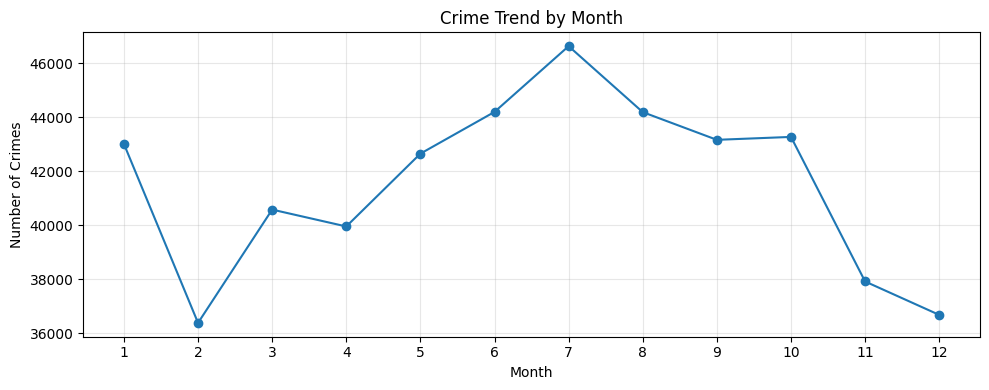

In [118]:
plt.figure(figsize=(10,4))
monthly_counts.plot(kind="line", marker="o")
plt.title("Crime Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [119]:
#ARREST & DOMESTIC ANALYSIS
df["arrest"].value_counts(normalize=True) * 100


arrest
0    85.162039
1    14.837961
Name: proportion, dtype: float64

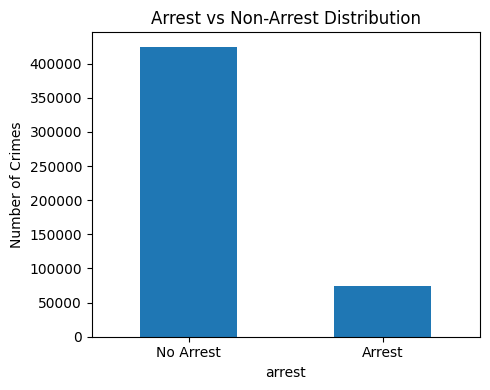

In [120]:
df["arrest"].value_counts().plot(
    kind="bar",
    figsize=(5,4),
    title="Arrest vs Non-Arrest Distribution"
)
plt.xticks([0,1], ["No Arrest", "Arrest"], rotation=0)
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


In [121]:
#Arrest Rate by Crime Type
arrest_by_crime = (
    df.groupby("primary_type")["arrest"]
    .mean()
    .sort_values(ascending=False)
)
arrest_by_crime.head(10)


primary_type
CONCEALED CARRY LICENSE VIOLATION    0.974790
GAMBLING                             0.971429
PUBLIC INDECENCY                     0.956522
NARCOTICS                            0.953579
LIQUOR LAW VIOLATION                 0.940000
PROSTITUTION                         0.939148
INTERFERENCE WITH PUBLIC OFFICER     0.901324
WEAPONS VIOLATION                    0.680885
NON-CRIMINAL                         0.666667
OTHER NARCOTIC VIOLATION             0.533333
Name: arrest, dtype: float64

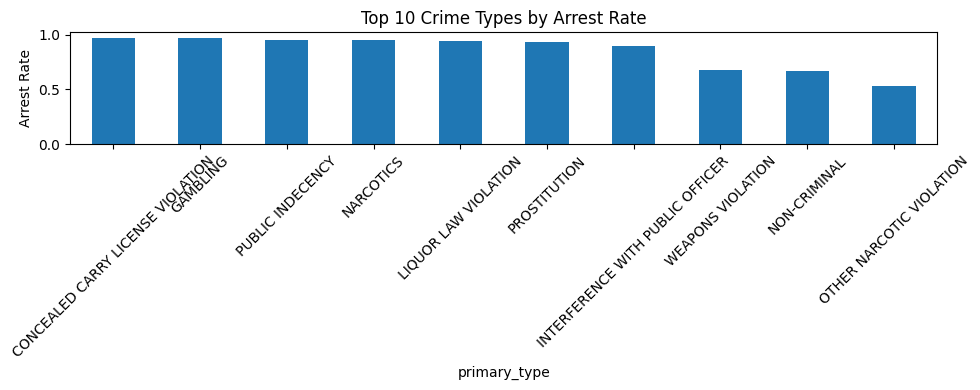

In [122]:
arrest_by_crime.head(10).plot(
    kind="bar",
    figsize=(10,4),
    title="Top 10 Crime Types by Arrest Rate"
)
plt.ylabel("Arrest Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [123]:
df["domestic"].value_counts(normalize=True) * 100


domestic
0    81.279269
1    18.720731
Name: proportion, dtype: float64

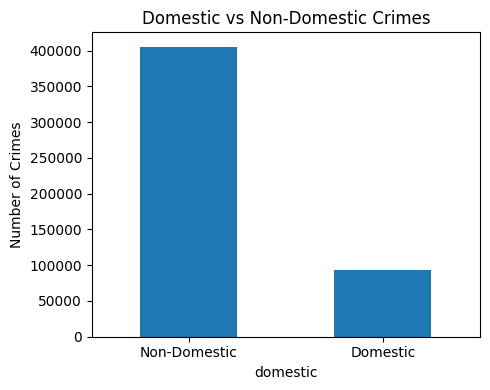

In [124]:
#Domestic vs Non-Domestic Crimes
df["domestic"].value_counts().plot(
    kind="bar",
    figsize=(5,4),
    title="Domestic vs Non-Domestic Crimes"
)
plt.xticks([0,1], ["Non-Domestic", "Domestic"], rotation=0)
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


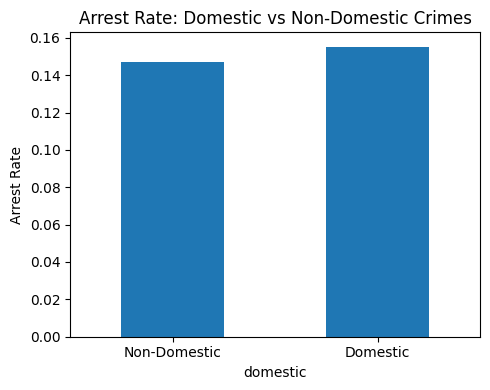

In [125]:
#Arrest Rate- Domestic vs Non-Domestic
df.groupby("domestic")["arrest"].mean()

df.groupby("domestic")["arrest"].mean().plot(
    kind="bar",
    figsize=(5,4),
    title="Arrest Rate: Domestic vs Non-Domestic Crimes"
)
plt.xticks([0,1], ["Non-Domestic", "Domestic"], rotation=0)
plt.ylabel("Arrest Rate")
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

In [126]:
df.columns


Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'hour', 'day_of_week', 'month', 'is_weekend', 'season',
       'lat_scaled', 'lon_scaled', 'geo_cluster', 'lat_bin', 'lon_bin',
       'crime_severity', 'primary_type_enc', 'location_desc_enc',
       'geo_cluster_kmeans', 'day_name', 'temporal_cluster'],
      dtype='object')

In [127]:
#TEMPORAL FEATURES
def season_from_month(m):
    if m in [12, 1, 2]:
        return 0   # winter
    elif m in [3, 4, 5]:
        return 1   # summer
    elif m in [6, 7, 8]:
        return 2   # monsoon
    else:
        return 3   # post-monsoon

df['season'] = df['month'].apply(season_from_month)


In [128]:
#Geographic Feature Engineering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["lat_scaled", "lon_scaled"]] = scaler.fit_transform(
    df[["latitude", "longitude"]]
)


In [129]:
#Geographic Clustering
from sklearn.cluster import KMeans

coords = df[["latitude", "longitude"]]

kmeans_geo = KMeans(n_clusters=8, random_state=42, n_init=10)
df["geo_cluster"] = kmeans_geo.fit_predict(coords)


In [130]:
#Coordinate Binning
df["lat_bin"] = pd.cut(df["latitude"], bins=20).cat.codes
df["lon_bin"] = pd.cut(df["longitude"], bins=20).cat.codes


In [131]:
# Crime Severity
severity_map = {
    "HOMICIDE": 5,
    "CRIMINAL SEXUAL ASSAULT": 5,
    "ROBBERY": 4,
    "AGGRAVATED ASSAULT": 4,
    "BURGLARY": 3,
    "MOTOR VEHICLE THEFT": 3,
    "THEFT": 2,
    "NARCOTICS": 2,
    "CRIMINAL DAMAGE": 2
}

df["crime_severity"] = (
    df["primary_type"]
    .str.upper()
    .map(severity_map)
    .fillna(1)
)


In [132]:
#Primary Crime Type Encoding
df["primary_type_enc"] = df["primary_type"].map(
    df["primary_type"].value_counts()
)


In [133]:
#Location Description Encoding
df["location_description"] = df["location_description"].fillna("UNKNOWN")

df["location_desc_enc"] = df["location_description"].map(
    df["location_description"].value_counts()
)


In [134]:
features = [
    "hour",
    "day_of_week",
    "is_weekend",
    "month",
    "season",
    "crime_severity",
    "geo_cluster",
    "lat_bin",
    "lon_bin",
    "primary_type_enc",
    "location_desc_enc",
    "lat_scaled",
    "lon_scaled"
]


In [135]:
X = df[features]
X.shape


(498613, 13)

In [136]:
df.to_csv("chicago_crime_500k_features.csv", index=False)


# Unsupervised learning 



In [47]:
# K-Means Clustering for identifying distinct crime concentration zones
# Expected Result: Identify 5-10 distinct geographic crime hotspots with clear cluster boundaries

# Hierarchical Clustering for nested geographic area analysis
# Expected Result: Create dendrogram showing hierarchical relationships between crime zones


# Model evaluation using silhouette score, Davies-Bouldin index, and elbow method
# Expected Result: Achieve silhouette score above 0.5 for best performing algorithm
# Best performing clustering algorithm will be selected for deployment


In [48]:
X = df[["latitude", "longitude"]].dropna().copy()
print("Geo rows:", X.shape)

Geo rows: (498613, 2)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

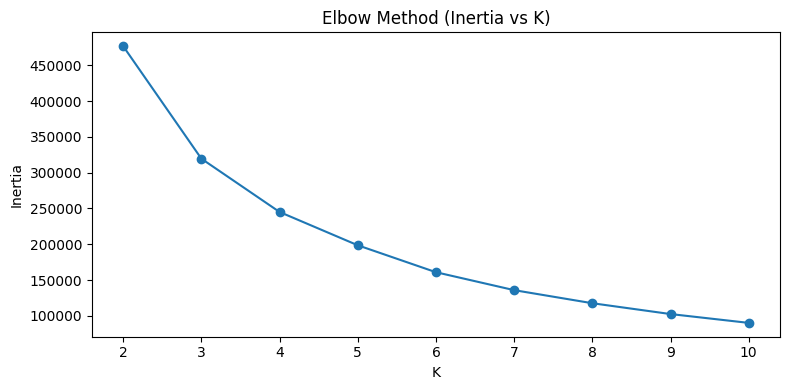

In [50]:
from sklearn.cluster import KMeans

ks = range(2, 11)  
inertias = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(list(ks), inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(list(ks))
plt.tight_layout()
plt.show()


In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# sample for scoring (adjust 5000 to 20000 if your laptop is strong)
sample_n = 10000
idx = np.random.RandomState(42).choice(X_scaled.shape[0], sample_n, replace=False)
X_sample = X_scaled[idx]


In [52]:
results = []

for k in range(5, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_full = km.fit_predict(X_scaled)      # full fit
    labels_sample = labels_full[idx]            # sample labels for scoring

    sil = silhouette_score(X_sample, labels_sample)          # sample score
    dbi = davies_bouldin_score(X_sample, labels_sample)      # sample score

    results.append({
        "k": k,
        "silhouette_sample": sil,
        "davies_bouldin_sample": dbi,
        "inertia": km.inertia_
    })

metrics_df = pd.DataFrame(results).sort_values("silhouette_sample", ascending=False)
metrics_df


,k,silhouette_sample,davies_bouldin_sample,inertia
5,10,0.415732,0.765702,90277.642291
4,9,0.407655,0.791108,102602.600405
3,8,0.404903,0.796635,117721.854240
0,5,0.403945,0.821926,198632.048470
1,6,0.402017,0.822775,161015.585025
2,7,0.398651,0.841684,135979.117068


In [53]:
best_k = 10

kmeans_final = KMeans(
    n_clusters=best_k,
    random_state=42,
    n_init=10
)

df["geo_cluster_kmeans"] = kmeans_final.fit_predict(X_scaled)


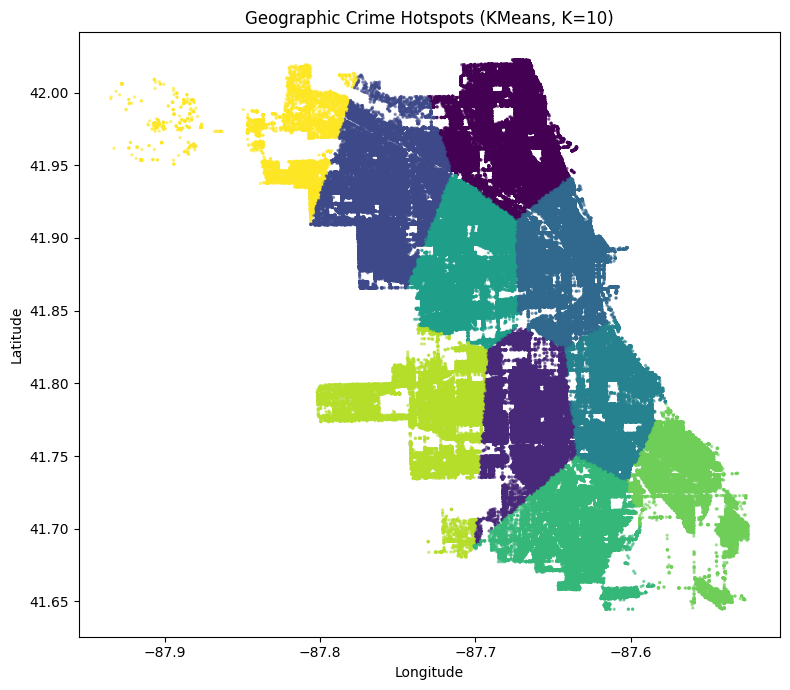

In [54]:

plt.figure(figsize=(8,7))
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["geo_cluster_kmeans"],
    s=2,
    alpha=0.5
)
plt.title("Geographic Crime Hotspots (KMeans, K=10)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [55]:
cluster_summary = (
    df.groupby("geo_cluster_kmeans")
      .agg(
          total_crimes=("geo_cluster_kmeans", "size"),
          arrest_rate=("arrest", "mean"),
          domestic_rate=("domestic", "mean"),
          top_crime=("primary_type", lambda x: x.value_counts().index[0]),
          center_lat=("latitude", "mean"),
          center_lon=("longitude", "mean")
      )
      .sort_values("total_crimes", ascending=False)
)

cluster_summary


,total_crimes,arrest_rate,domestic_rate,top_crime,center_lat,center_lon
geo_cluster_kmeans,,,,,,
3,87734,0.135842,0.074418,THEFT,41.884097,-87.639428
5,71768,0.206164,0.195533,BATTERY,41.882349,-87.707391
4,61064,0.126670,0.237014,BATTERY,41.785658,-87.611454
0,60151,0.117970,0.112750,THEFT,41.970801,-87.674057
2,56609,0.167783,0.224470,THEFT,41.919697,-87.755243
1,49965,0.161933,0.263204,BATTERY,41.774336,-87.664911
6,37449,0.151513,0.250047,BATTERY,41.700286,-87.632725
7,36280,0.116262,0.257332,BATTERY,41.740144,-87.565823
8,28734,0.134405,0.199589,THEFT,41.782624,-87.724802


In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Take a safe sample for hierarchical clustering
sample_size = 7000   # 5k–10k is ideal
X_h = X.sample(sample_size, random_state=42)

# Scale again (important for distance calculations)
scaler_h = StandardScaler()
X_h_scaled = scaler_h.fit_transform(X_h)


In [57]:
from scipy.cluster.hierarchy import linkage

Z = linkage(X_h_scaled, method="ward")


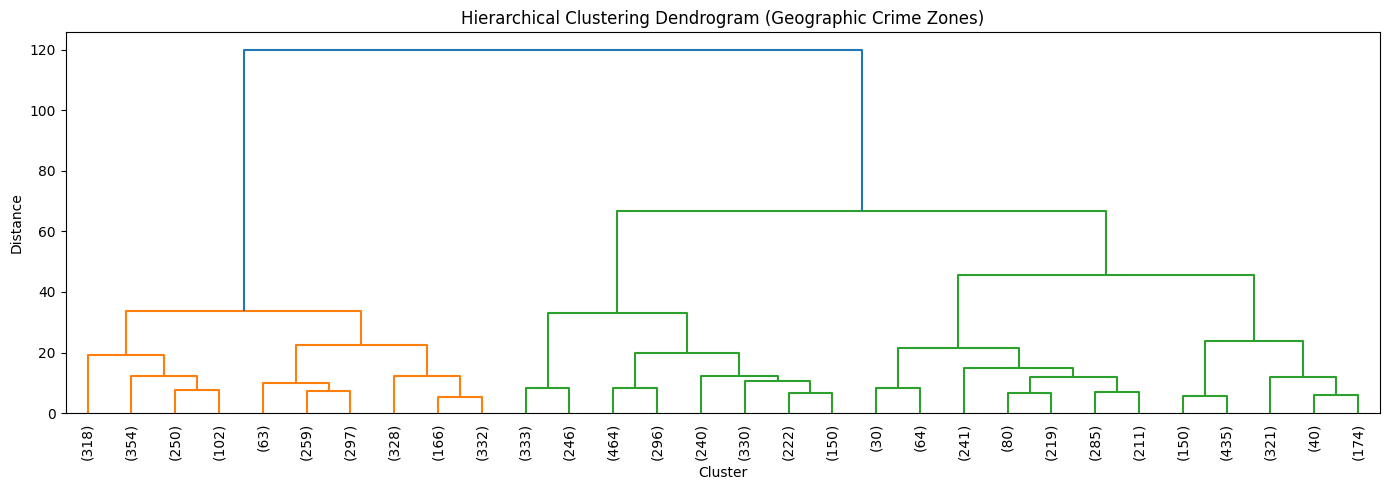

In [58]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
dendrogram(
    Z,
    truncate_mode="lastp",  # show only last clusters
    p=30,                   # number of clusters to display
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram (Geographic Crime Zones)")
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [59]:
# Temporal Clustering – Crime Time Patterns

df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [60]:
df["hour"] = df["date"].dt.hour
df["day_of_week"] = df["date"].dt.dayofweek   # 0=Monday, 6=Sunday
df["month"] = df["date"].dt.month


In [61]:
df["day_name"] = df["date"].dt.day_name()


In [62]:
df[["hour", "day_of_week", "month"]].describe()


,hour,day_of_week,month
count,498613.000000,498613.000000,498613.000000
mean,12.502039,3.016422,6.486044
std,6.829519,2.000574,3.375052
min,0.000000,0.000000,1.000000
25%,8.000000,1.000000,4.000000
50%,13.000000,3.000000,7.000000
75%,18.000000,5.000000,9.000000
max,23.000000,6.000000,12.000000


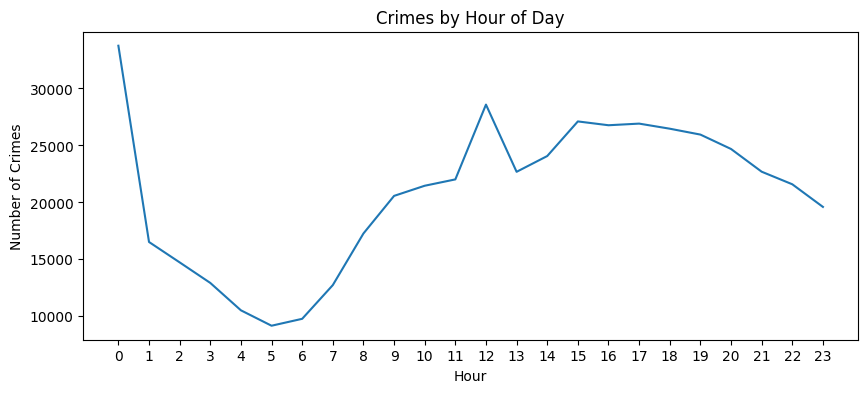

In [63]:
hourly_counts = df.groupby("hour").size()

hourly_counts.plot(
    kind="line",
    figsize=(10,4),
    title="Crimes by Hour of Day"
)
plt.xlabel("Hour")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.show()


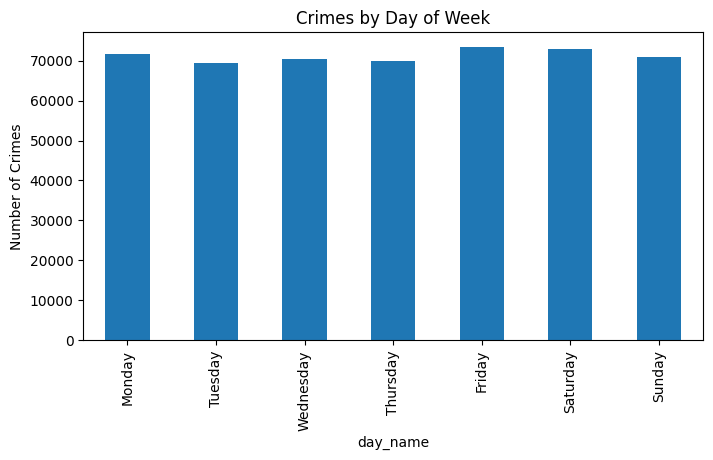

In [64]:
day_counts = df.groupby("day_name").size().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

day_counts.plot(
    kind="bar",
    figsize=(8,4),
    title="Crimes by Day of Week"
)
plt.ylabel("Number of Crimes")
plt.show()


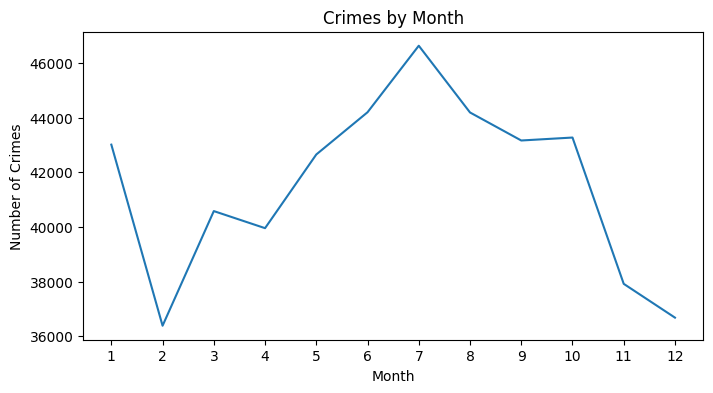

In [65]:
monthly_counts = df.groupby("month").size()

monthly_counts.plot(
    kind="line",
    figsize=(8,4),
    title="Crimes by Month"
)
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(range(1,13))
plt.show()


In [66]:
from sklearn.preprocessing import StandardScaler

X_time = df[["hour", "day_of_week", "month"]].dropna()

scaler_time = StandardScaler()
X_time_scaled = scaler_time.fit_transform(X_time)


In [67]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

results_time = []

for k in range(3, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_time_scaled)

    sil = silhouette_score(X_time_scaled[:10000], labels[:10000])
    results_time.append({"k": k, "silhouette": sil})

pd.DataFrame(results_time)


,k,silhouette
0,3,0.362184
1,4,0.360170
2,5,0.340900


In [68]:
best_k_time = 3  # update if your table suggests otherwise

kmeans_time = KMeans(
    n_clusters=best_k_time,
    random_state=42,
    n_init=10
)

df["temporal_cluster"] = kmeans_time.fit_predict(X_time_scaled)


In [69]:
temporal_summary = (
    df.groupby("temporal_cluster")
      .agg(
          total_crimes=("temporal_cluster", "size"),
          avg_hour=("hour", "mean"),
          common_day=("day_name", lambda x: x.value_counts().index[0]),
          common_month=("month", lambda x: x.value_counts().index[0]),
          arrest_rate=("arrest", "mean")
      )
)

temporal_summary


,total_crimes,avg_hour,common_day,common_month,arrest_rate
temporal_cluster,,,,,
0,136937,3.550852,Sunday,7,0.121903
1,181384,15.785257,Monday,1,0.162583
2,180292,15.997621,Tuesday,10,0.154200


# Unsupervised learning 

In [70]:
# PCA (Principal Component Analysis)
pca_features = [
    "latitude", "longitude",
    "hour", "day_of_week", "month",
    "arrest", "domestic",
    "beat", "district", "ward", "community_area",
    "year"
]

X_pca = df[pca_features].dropna()


In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)


In [72]:
# PCA — Variance Exploration
from sklearn.decomposition import PCA

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_pca_scaled)


In [73]:
import numpy as np

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
explained_variance


array([0.33436009, 0.43012498, 0.51953265, 0.60658511, 0.68877959,
       0.76684701, 0.8387892 , 0.90804741, 0.95730842, 0.98744235,
       0.99998529, 1.        ])

In [74]:
# Number of components
np.where(explained_variance >= 0.70)[0][0] + 1


np.int64(6)

In [75]:
# Dimensionality Reduction
pca = PCA(n_components=3)
X_pca_reduced = pca.fit_transform(X_pca_scaled)

pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()


(array([0.33436009, 0.09576489, 0.08940767]), np.float64(0.5195326496492754))

In [76]:
# PCA Feature Importance
loading_df = pd.DataFrame(
    pca.components_.T,
    index=pca_features,
    columns=["PC1", "PC2", "PC3"]
)

loading_df


,PC1,PC2,PC3
latitude,0.437851,-0.011811,-0.093583
longitude,-0.325394,-0.042880,-0.152496
hour,0.006268,0.062789,-0.562939
day_of_week,0.005482,0.044379,0.435281
month,0.000359,-0.675049,-0.017041
arrest,0.002342,0.248535,-0.279588
domestic,-0.063339,0.092507,0.572249
beat,0.446376,0.011740,0.113105
district,0.446702,0.011733,0.113083
ward,0.419528,0.002496,-0.027148


In [77]:
loading_df["importance"] = loading_df.abs().sum(axis=1)
loading_df.sort_values("importance", ascending=False).head(5)


,PC1,PC2,PC3,importance
domestic,-0.063339,0.092507,0.572249,0.728095
year,-0.007586,0.681878,0.008579,0.698043
month,0.000359,-0.675049,-0.017041,0.692449
hour,0.006268,0.062789,-0.562939,0.631996
district,0.446702,0.011733,0.113083,0.571518


In [78]:
tsne_sample = X_pca_scaled[np.random.choice(X_pca_scaled.shape[0], 8000, replace=False)]
labels_sample = df.loc[X_pca.index].sample(8000, random_state=42)["geo_cluster_kmeans"]


In [79]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(tsne_sample)


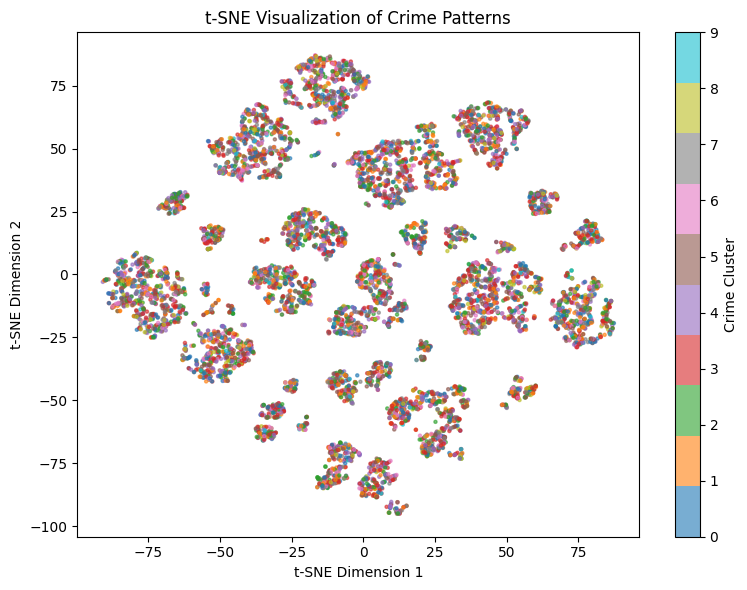

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    X_tsne[:,0],
    X_tsne[:,1],
    c=labels_sample,
    cmap="tab10",
    s=5,
    alpha=0.6
)
plt.title("t-SNE Visualization of Crime Patterns")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label="Crime Cluster")
plt.tight_layout()
plt.show()


# MLflow Integration

In [99]:
# =========================================================
# MLflow Integration (FULLY UPDATED + CLEAN)
# Works with: mlflow.set_tracking_uri("file:./mlruns")
# Logs:
# 1) Geo KMeans (k sweep + final metrics + plots + model)
# 2) Hierarchical (dendrogram artifact)
# 3) Temporal KMeans (k sweep + final metrics + artifacts + model)
# 4) PCA (variance + reconstruction error + loadings + scree plot + model)
# 5) t-SNE (plot + points CSV + cluster counts)
#
# IMPORTANT: This block assumes you ALREADY computed/created:
# df, X_scaled, X_sample, idx, ks, inertias, best_k, kmeans_final,
# metrics_df, cluster_summary, sample_size, X_h_scaled, Z,
# X_time, X_time_scaled, best_k_time, results_time, temporal_summary,
# pca_features, X_pca, X_pca_scaled, pca_full, pca, X_pca_reduced, loading_df
# =========================================================

# -----------------------------
# MLflow config (LOCAL FILE STORE)
# -----------------------------
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("PatrolIQ_ChicagoCrime_500k")

ART_DIR = "mlflow_artifacts"
os.makedirs(ART_DIR, exist_ok=True)

def save_plot(path: str):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()

def log_df(df_obj: pd.DataFrame, filename: str):
    path = os.path.join(ART_DIR, filename)
    df_obj.to_csv(path, index=False)
    mlflow.log_artifact(path)
    return path

def safe_register_model(model_uri: str, name: str):
    """
    MLflow registry may NOT be supported for file-based tracking.
    This function won't break your run if registry is unavailable.
    """
    try:
        mlflow.register_model(model_uri=model_uri, name=name)
        print(f"✅ Model registered: {name}")
    except MlflowException as e:
        print(f"⚠️ Registry not supported in this tracking setup. Model still logged in run.")
        print("   Reason:", str(e).split("\n")[0])


In [101]:
import mlflow

print("Active run before:", mlflow.active_run())
mlflow.end_run()
print("Active run after:", mlflow.active_run())


Active run before: <ActiveRun: >
Active run after: None


In [102]:
# RUN 1: Geographic KMeans
with mlflow.start_run(run_name="Geo_KMeans") as run:
    mlflow.set_tag("task", "geographic_hotspot_clustering")
    mlflow.set_tag("algorithm", "kmeans")

    mlflow.log_param("features", "latitude,longitude")
    mlflow.log_param("scaler", "StandardScaler")
    mlflow.log_param("best_k", int(best_k))
    mlflow.log_param("n_init", 10)
    mlflow.log_param("random_state", 42)
    mlflow.log_param("sample_n_for_metrics", int(len(idx)))

    # k sweep table
    log_df(metrics_df, "geo_kmeans_k_sweep_metrics.csv")

    # final metrics on sample (FAST)
    labels_full = df.loc[df[["latitude","longitude"]].dropna().index, "geo_cluster_kmeans"].astype(int).values
    labels_sample = labels_full[idx]

    sil = silhouette_score(X_sample, labels_sample)
    dbi = davies_bouldin_score(X_sample, labels_sample)

    mlflow.log_metric("silhouette_sample", float(sil))
    mlflow.log_metric("davies_bouldin_sample", float(dbi))
    mlflow.log_metric("inertia", float(kmeans_final.inertia_))
    mlflow.log_metric("n_rows", int(X_scaled.shape[0]))

    # cluster summary artifact
    cs = cluster_summary.copy()
    if "geo_cluster_kmeans" not in cs.columns:
        # if summary came from groupby index
        cs = cs.reset_index()
    log_df(cs, "geo_cluster_summary.csv")

    # elbow plot
    elbow_path = os.path.join(ART_DIR, "geo_elbow.png")
    plt.figure(figsize=(8,4))
    plt.plot(list(ks), inertias, marker="o")
    plt.title("Elbow Method (Inertia vs K)")
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.xticks(list(ks))
    save_plot(elbow_path)
    mlflow.log_artifact(elbow_path)

    # hotspot plot (use only rows where cluster exists)
    hotspot_path = os.path.join(ART_DIR, "geo_hotspots_kmeans.png")
    plot_df = df.dropna(subset=["latitude","longitude","geo_cluster_kmeans"]).copy()
    plt.figure(figsize=(8,7))
    plt.scatter(
        plot_df["longitude"],
        plot_df["latitude"],
        c=plot_df["geo_cluster_kmeans"].astype(int),
        s=2,
        alpha=0.5,
        cmap="tab10"
    )
    plt.title(f"Geographic Crime Hotspots (KMeans, K={best_k})")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    save_plot(hotspot_path)
    mlflow.log_artifact(hotspot_path)

    # log model (always works)
    mlflow.sklearn.log_model(kmeans_final, artifact_path="model")

    # registry (optional; file store usually doesn't support it)
    safe_register_model(model_uri=f"runs:/{run.info.run_id}/model", name="PatrolIQ_Geo_KMeans")

    print("✅ Geo KMeans logged. Run ID:", run.info.run_id)




2026/02/08 13:09:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Users/hemanthkumar/Desktop/PatrolIQ/.venv/lib/python3.13/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
Registered model 'PatrolIQ_Geo_KMeans' already exists. Creating a new version of this model...
2026/02/08 13:09:45 WARNING mlflow.tracking._model_registry.fluent: Run with id 47abb707abf84578b50ae6d3c541e057 has no artifacts at artifact path 'model', registering model based on models:/m-cef88e91abe5465dbd4b2337699bfd67 instead


✅ Model registered: PatrolIQ_Geo_KMeans
✅ Geo KMeans logged. Run ID: 47abb707abf84578b50ae6d3c541e057


Created version '3' of model 'PatrolIQ_Geo_KMeans'.


In [103]:
    # RUN 2: Hierarchical dendrogram
with mlflow.start_run(run_name="Geo_Hierarchical", nested=True) as run:
        mlflow.set_tag("task", "geographic_hotspot_clustering")
        mlflow.set_tag("algorithm", "hierarchical_ward")

        mlflow.log_param("method", "ward")
        mlflow.log_param("sample_size", int(sample_size))
        mlflow.log_param("features", "latitude,longitude")
        mlflow.log_metric("n_rows_sample", int(X_h_scaled.shape[0]))

        dendro_path = os.path.join(ART_DIR, "hierarchical_dendrogram.png")
        plt.figure(figsize=(14,5))
        from scipy.cluster.hierarchy import dendrogram
        dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=10)
        plt.title("Hierarchical Clustering Dendrogram (Geographic Crime Zones)")
        plt.xlabel("Cluster")
        plt.ylabel("Distance")
        save_plot(dendro_path)
        mlflow.log_artifact(dendro_path)

        print("✅ Hierarchical logged:", run.info.run_id)


✅ Hierarchical logged: 3d3634379acc4f7884363e234a64b314


In [104]:

    # RUN 3: Temporal KMeans
with mlflow.start_run(run_name="Temporal_KMeans", nested=True) as run:
        mlflow.set_tag("task", "temporal_pattern_clustering")
        mlflow.set_tag("algorithm", "kmeans")

        mlflow.log_param("features", "hour,day_of_week,month")
        mlflow.log_param("scaler", "StandardScaler")
        mlflow.log_param("best_k_time", int(best_k_time))
        mlflow.log_param("n_init", 10)
        mlflow.log_param("random_state", 42)

        log_df(pd.DataFrame(results_time), "temporal_k_sweep_silhouette.csv")
        log_df(temporal_summary.reset_index(), "temporal_cluster_summary.csv")

        sample_t = min(10000, X_time_scaled.shape[0])
        sil_time = silhouette_score(
            X_time_scaled[:sample_t],
            df.loc[X_time.index, "temporal_cluster"].values[:sample_t]
        )
        mlflow.log_metric("silhouette_sample", float(sil_time))
        mlflow.log_metric("n_rows", int(X_time_scaled.shape[0]))

        print("✅ Temporal logged:", run.info.run_id)

    

✅ Temporal logged: bb5bdad71b904028a7238ac95f6a9656


In [105]:
    # RUN 4: PCA
with mlflow.start_run(run_name="PCA", nested=True) as run:
        mlflow.set_tag("task", "dimensionality_reduction")
        mlflow.set_tag("algorithm", "pca")

        mlflow.log_param("pca_features", ",".join(pca_features))
        mlflow.log_param("n_components", 3)

        var_sum = float(pca.explained_variance_ratio_.sum())
        mlflow.log_metric("explained_variance_sum_3", var_sum)
        mlflow.log_metric("pc1_var", float(pca.explained_variance_ratio_[0]))
        mlflow.log_metric("pc2_var", float(pca.explained_variance_ratio_[1]))
        mlflow.log_metric("pc3_var", float(pca.explained_variance_ratio_[2]))

        X_recon = pca.inverse_transform(X_pca_reduced)
        recon_mse = float(np.mean((X_pca_scaled - X_recon) ** 2))
        mlflow.log_metric("reconstruction_mse", recon_mse)

        loadings_out = loading_df.copy()
        loadings_out["importance"] = loadings_out.abs().sum(axis=1)
        loadings_out = loadings_out.sort_values("importance", ascending=False).reset_index().rename(columns={"index":"feature"})
        log_df(loadings_out, "pca_feature_loadings.csv")

        scree_path = os.path.join(ART_DIR, "pca_cumulative_variance.png")
        plt.figure(figsize=(8,4))
        plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
        plt.axhline(0.70, linestyle="--")
        plt.title("PCA Cumulative Explained Variance")
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        save_plot(scree_path)
        mlflow.log_artifact(scree_path)

        print("✅ PCA logged:", run.info.run_id)

    

✅ PCA logged: ba2ed365bd774368887aef9936e4059a


In [106]:
    # RUN 5: t-SNE
with mlflow.start_run(run_name="tSNE", nested=True) as run:
        mlflow.set_tag("task", "dimensionality_reduction")
        mlflow.set_tag("algorithm", "tsne")

        perplexity = 30
        learning_rate = 200
        n_components = 2
        sample_size = 8000

        mlflow.log_param("perplexity", perplexity)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("n_components", n_components)
        mlflow.log_param("sample_size", sample_size)

        rng = np.random.RandomState(42)
        sample_idx = rng.choice(X_pca_scaled.shape[0], sample_size, replace=False)

        X_tsne_input = X_pca_scaled[sample_idx]
        labels_tsne = df.loc[X_pca.index, "geo_cluster_kmeans"].iloc[sample_idx].astype(int).values

        tsne = TSNE(
            n_components=n_components,
            perplexity=perplexity,
            learning_rate=learning_rate,
            random_state=42
        )
        X_tsne = tsne.fit_transform(X_tsne_input)

        tsne_path = os.path.join(ART_DIR, "tsne_clusters.png")
        plt.figure(figsize=(8,6))
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_tsne, s=5, alpha=0.6, cmap="tab10")
        plt.title("t-SNE Visualization of Crime Patterns (Geo Clusters)")
        plt.xlabel("t-SNE Dim 1")
        plt.ylabel("t-SNE Dim 2")
        plt.colorbar(label="Geo Cluster")
        save_plot(tsne_path)
        mlflow.log_artifact(tsne_path)

        tsne_df = pd.DataFrame({"tsne_1": X_tsne[:,0], "tsne_2": X_tsne[:,1], "cluster": labels_tsne})
        log_df(tsne_df, "tsne_points.csv")

        for c, cnt in pd.Series(labels_tsne).value_counts().sort_index().items():
            mlflow.log_metric(f"cluster_{int(c)}_count", int(cnt))

        print("✅ t-SNE logged:", run.info.run_id)

print("\n✅ All runs logged under one parent run.")

✅ t-SNE logged: 0192fd294b104eee9b65c602d057d967

✅ All runs logged under one parent run.


In [ ]:


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
from mlflow.exceptions import MlflowException

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# MLflow Config (SERVER MODE)
mlflow.end_run()  # ✅ kill any active run safely

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("PatrolIQ_ChicagoCrime_500k")

ART_DIR = "mlflow_artifacts"
os.makedirs(ART_DIR, exist_ok=True)

def save_plot(path: str):
    plt.tight_layout()
    plt.savefig(path, dpi=150)
    plt.close()

def log_df(df_obj: pd.DataFrame, filename: str):
    path = os.path.join(ART_DIR, filename)
    df_obj.to_csv(path, index=False)
    mlflow.log_artifact(path)
    return path

def safe_register_model(run_id: str, artifact_path: str, name: str):
    """
    Registers model to MLflow Model Registry (works in server mode).
    If registry fails, run still keeps the logged model.
    """
    model_uri = f"runs:/{run_id}/{artifact_path}"
    try:
        mlflow.register_model(model_uri=model_uri, name=name)
        print(f"✅ Model registered: {name} ({model_uri})")
    except Exception as e:
        print("⚠️ Model registry failed, but model is still logged in artifacts.")
        print("   Reason:", str(e).split("\n")[0])


# PARENT RUN (all runs nested under this)
with mlflow.start_run(run_name="PatrolIQ_Full_Pipeline") as parent_run:
    mlflow.set_tag("project", "PatrolIQ")
    mlflow.set_tag("dataset", "Chicago Crime 500K")

    # RUN 1: Geo KMeans
    with mlflow.start_run(run_name="Geo_KMeans", nested=True) as run:
        mlflow.set_tag("task", "geographic_hotspot_clustering")
        mlflow.set_tag("algorithm", "kmeans")

        mlflow.log_param("features", "latitude,longitude")
        mlflow.log_param("scaler", "StandardScaler")
        mlflow.log_param("best_k", int(best_k))
        mlflow.log_param("n_init", 10)
        mlflow.log_param("random_state", 42)
        mlflow.log_param("sample_n_for_metrics", int(len(idx)))

        # log sweep table
        log_df(metrics_df, "geo_kmeans_k_sweep_metrics.csv")

        # metrics (sample)
        labels_full = df.loc[X.index, "geo_cluster_kmeans"].astype(int).values
        labels_sample = labels_full[idx]

        sil = silhouette_score(X_sample, labels_sample)
        dbi = davies_bouldin_score(X_sample, labels_sample)

        mlflow.log_metric("silhouette_sample", float(sil))
        mlflow.log_metric("davies_bouldin_sample", float(dbi))
        mlflow.log_metric("inertia", float(kmeans_final.inertia_))
        mlflow.log_metric("n_rows", int(X_scaled.shape[0]))

        # summary
        cs = cluster_summary.reset_index() if hasattr(cluster_summary, "reset_index") else cluster_summary
        log_df(cs, "geo_cluster_summary.csv")

        # elbow plot
        elbow_path = os.path.join(ART_DIR, "geo_elbow.png")
        plt.figure(figsize=(8,4))
        plt.plot(list(ks), inertias, marker="o")
        plt.title("Elbow Method (Inertia vs K)")
        plt.xlabel("K")
        plt.ylabel("Inertia")
        plt.xticks(list(ks))
        save_plot(elbow_path)
        mlflow.log_artifact(elbow_path)

        # hotspot plot
        hotspot_path = os.path.join(ART_DIR, "geo_hotspots_kmeans.png")
        plot_df = df.dropna(subset=["latitude","longitude","geo_cluster_kmeans"]).copy()
        plt.figure(figsize=(8,7))
        plt.scatter(
            plot_df["longitude"],
            plot_df["latitude"],
            c=plot_df["geo_cluster_kmeans"].astype(int),
            s=2,
            alpha=0.5,
            cmap="tab10"
        )
        plt.title(f"Geographic Crime Hotspots (KMeans, K={best_k})")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        save_plot(hotspot_path)
        mlflow.log_artifact(hotspot_path)

        # log model
        mlflow.sklearn.log_model(kmeans_final, artifact_path="geo_kmeans_model")

        # registry
        safe_register_model(run.info.run_id, "geo_kmeans_model", "PatrolIQ_Geo_KMeans")

        print("✅ Geo KMeans logged:", run.info.run_id)


    #  Hierarchical Dendrogram
    with mlflow.start_run(run_name="Geo_Hierarchical", nested=True) as run:
        mlflow.set_tag("task", "geographic_hotspot_clustering")
        mlflow.set_tag("algorithm", "hierarchical_ward")

        mlflow.log_param("method", "ward")
        mlflow.log_param("sample_size", int(sample_size))
        mlflow.log_param("features", "latitude,longitude")
        mlflow.log_metric("n_rows_sample", int(X_h_scaled.shape[0]))

        dendro_path = os.path.join(ART_DIR, "hierarchical_dendrogram.png")
        plt.figure(figsize=(14,5))
        from scipy.cluster.hierarchy import dendrogram
        dendrogram(Z, truncate_mode="lastp", p=30, leaf_rotation=90, leaf_font_size=10)
        plt.title("Hierarchical Clustering Dendrogram (Geographic Crime Zones)")
        plt.xlabel("Cluster")
        plt.ylabel("Distance")
        save_plot(dendro_path)
        mlflow.log_artifact(dendro_path)

        print("✅ Hierarchical logged:", run.info.run_id)


    #  Temporal KMeans
    with mlflow.start_run(run_name="Temporal_KMeans", nested=True) as run:
        mlflow.set_tag("task", "temporal_pattern_clustering")
        mlflow.set_tag("algorithm", "kmeans")

        mlflow.log_param("features", "hour,day_of_week,month")
        mlflow.log_param("scaler", "StandardScaler")
        mlflow.log_param("best_k_time", int(best_k_time))
        mlflow.log_param("n_init", 10)
        mlflow.log_param("random_state", 42)

        log_df(pd.DataFrame(results_time), "temporal_k_sweep_silhouette.csv")
        log_df(temporal_summary.reset_index(), "temporal_cluster_summary.csv")

        sample_t = min(10000, X_time_scaled.shape[0])
        sil_time = silhouette_score(
            X_time_scaled[:sample_t],
            df.loc[X_time.index, "temporal_cluster"].values[:sample_t]
        )
        mlflow.log_metric("silhouette_sample", float(sil_time))
        mlflow.log_metric("n_rows", int(X_time_scaled.shape[0]))

        print("✅ Temporal logged:", run.info.run_id)


    # PCA (variance + reconstruction + loadings)
    with mlflow.start_run(run_name="PCA", nested=True) as run:
        mlflow.set_tag("task", "dimensionality_reduction")
        mlflow.set_tag("algorithm", "pca")

        mlflow.log_param("pca_features", ",".join(pca_features))
        mlflow.log_param("n_components", 3)

        var_sum = float(pca.explained_variance_ratio_.sum())
        mlflow.log_metric("explained_variance_sum_3", var_sum)
        mlflow.log_metric("pc1_var", float(pca.explained_variance_ratio_[0]))
        mlflow.log_metric("pc2_var", float(pca.explained_variance_ratio_[1]))
        mlflow.log_metric("pc3_var", float(pca.explained_variance_ratio_[2]))

        X_recon = pca.inverse_transform(X_pca_reduced)
        recon_mse = float(np.mean((X_pca_scaled - X_recon) ** 2))
        mlflow.log_metric("reconstruction_mse", recon_mse)

        loadings_out = loading_df.copy()
        loadings_out["importance"] = loadings_out.abs().sum(axis=1)
        loadings_out = loadings_out.sort_values("importance", ascending=False).reset_index().rename(columns={"index":"feature"})
        log_df(loadings_out, "pca_feature_loadings.csv")

        scree_path = os.path.join(ART_DIR, "pca_cumulative_variance.png")
        plt.figure(figsize=(8,4))
        plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker="o")
        plt.axhline(0.70, linestyle="--")
        plt.title("PCA Cumulative Explained Variance")
        plt.xlabel("Number of Components")
        plt.ylabel("Cumulative Explained Variance")
        save_plot(scree_path)
        mlflow.log_artifact(scree_path)

        mlflow.sklearn.log_model(pca, artifact_path="pca_model")
        safe_register_model(run.info.run_id, "pca_model", "PatrolIQ_PCA")

        print("✅ PCA logged:", run.info.run_id)


    # t-SNE (plot + points + counts)
    with mlflow.start_run(run_name="tSNE", nested=True) as run:
        mlflow.set_tag("task", "dimensionality_reduction")
        mlflow.set_tag("algorithm", "tsne")

        perplexity = 30
        learning_rate = 200
        n_components = 2
        sample_size = 8000

        mlflow.log_param("perplexity", perplexity)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("n_components", n_components)
        mlflow.log_param("sample_size", sample_size)

        rng = np.random.RandomState(42)
        sample_idx = rng.choice(X_pca_scaled.shape[0], sample_size, replace=False)

        X_tsne_input = X_pca_scaled[sample_idx]
        labels_tsne = df.loc[X_pca.index, "geo_cluster_kmeans"].iloc[sample_idx].astype(int).values

        tsne = TSNE(
            n_components=n_components,
            perplexity=perplexity,
            learning_rate=learning_rate,
            random_state=42
        )
        X_tsne = tsne.fit_transform(X_tsne_input)

        tsne_path = os.path.join(ART_DIR, "tsne_clusters.png")
        plt.figure(figsize=(8,6))
        plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_tsne, s=5, alpha=0.6, cmap="tab10")
        plt.title("t-SNE Visualization of Crime Patterns (Geo Clusters)")
        plt.xlabel("t-SNE Dim 1")
        plt.ylabel("t-SNE Dim 2")
        plt.colorbar(label="Geo Cluster")
        save_plot(tsne_path)
        mlflow.log_artifact(tsne_path)

        tsne_df = pd.DataFrame({"tsne_1": X_tsne[:,0], "tsne_2": X_tsne[:,1], "cluster": labels_tsne})
        log_df(tsne_df, "tsne_points.csv")

        for c, cnt in pd.Series(labels_tsne).value_counts().sort_index().items():
            mlflow.log_metric(f"cluster_{int(c)}_count", int(cnt))

        print("✅ t-SNE logged:", run.info.run_id)

print("\n✅ All runs logged under ONE parent run.")


2026/02/08 13:27:54 INFO mlflow.tracking.fluent: Experiment with name 'PatrolIQ_ChicagoCrime_500k' does not exist. Creating a new experiment.
2026/02/08 13:28:00 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Users/hemanthkumar/Desktop/PatrolIQ/.venv/lib/python3.13/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
Successfully registered model 'PatrolIQ_Geo_KMeans'.
2026/02/08 13:28:02 WARNING mlflow.tracking._model_registry.fluent: Run with id 16e7ede6fcb64a2cb5a019ee2f7910b1 has no artifacts at artifact path 'geo_kmeans_model', registering model based on models:/m-b573b4ce16e44195993eb4c34a9d98

✅ Model registered: PatrolIQ_Geo_KMeans (runs:/16e7ede6fcb64a2cb5a019ee2f7910b1/geo_kmeans_model)
✅ Geo KMeans logged: 16e7ede6fcb64a2cb5a019ee2f7910b1
🏃 View run Geo_KMeans at: http://127.0.0.1:5000/#/experiments/1/runs/16e7ede6fcb64a2cb5a019ee2f7910b1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✅ Hierarchical logged: f4598c67d1d24454aa8261b86f654ac8
🏃 View run Geo_Hierarchical at: http://127.0.0.1:5000/#/experiments/1/runs/f4598c67d1d24454aa8261b86f654ac8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


2026/02/08 13:28:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/Users/hemanthkumar/Desktop/PatrolIQ/.venv/lib/python3.13/site-packages/mlflow/models/model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)
2026/02/08 13:28:03 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


✅ Temporal logged: 44923bab44b74669945c7bf3fd2a8f8f
🏃 View run Temporal_KMeans at: http://127.0.0.1:5000/#/experiments/1/runs/44923bab44b74669945c7bf3fd2a8f8f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1


Successfully registered model 'PatrolIQ_PCA'.
2026/02/08 13:28:05 WARNING mlflow.tracking._model_registry.fluent: Run with id 421800b6ee7648ce858ea93db3d63883 has no artifacts at artifact path 'pca_model', registering model based on models:/m-e8b0cc21da5148778421a8aca0664c38 instead
2026/02/08 13:28:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PatrolIQ_PCA, version 1
Created version '1' of model 'PatrolIQ_PCA'.


✅ Model registered: PatrolIQ_PCA (runs:/421800b6ee7648ce858ea93db3d63883/pca_model)
✅ PCA logged: 421800b6ee7648ce858ea93db3d63883
🏃 View run PCA at: http://127.0.0.1:5000/#/experiments/1/runs/421800b6ee7648ce858ea93db3d63883
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
✅ t-SNE logged: 4fb66e0bc1134dd0ba3a38325b6d8cf5
🏃 View run tSNE at: http://127.0.0.1:5000/#/experiments/1/runs/4fb66e0bc1134dd0ba3a38325b6d8cf5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1
🏃 View run PatrolIQ_Full_Pipeline at: http://127.0.0.1:5000/#/experiments/1/runs/d66f37fde3ae4912a61cb9c30da93e80
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/1

✅ All runs logged under ONE parent run.
